## Predicting Football Results using Team Performance using pySpark

We are predicting  2020/21 football results of top 5 leagues using  2019/20 results and finding which model predicts the results with high accuracy. 

### Tools used

- MongoDb for storing and retrieving the results of top 5 leagues
- PySpark for applying various Machine Learning algorithms on our data




In [1]:
#installing dependencies
!pip install pyspark


In [2]:
!pip install sparksql-magic

In [3]:
import pyspark

In [4]:
!pip install pymongo
!pip install pandas

In [5]:
import pymongo

In [6]:
import pandas as pd

In [7]:
client = pymongo.MongoClient("mongodb://localhost:27017")


### Preparing the Dataset and storing them in MongoDB

In [18]:
db = client["LeagueStats"]

In [19]:
print(db)

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'LeagueStats')


In [20]:
db.PL2021.insert_many(data)

In [21]:
#storing the data in csv files to mongodb
df = pd.read_csv(r"C:\Users\Aswath\Desktop\Big Data Pack\Datas\PL2020-21.csv")
data = df.to_dict(orient="records")
db.PL2021.insert_many(data)
df = pd.read_csv(r"C:\Users\Aswath\Desktop\Big Data Pack\Datas\PL2019-20.csv")
data = df.to_dict(orient="records")
db.PL2020.insert_many(data)

In [22]:
df = pd.read_csv(r"C:\Users\Aswath\Desktop\Big Data Pack\Datas\Bundesliga2020-21.csv")
data = df.to_dict(orient="records")
db.Bundesliga2021.insert_many(data)
df = pd.read_csv(r"C:\Users\Aswath\Desktop\Big Data Pack\Datas\Bundesliga2019-20.csv")
data = df.to_dict(orient="records")
db.Bundesliga2020.insert_many(data)

In [23]:
df = pd.read_csv(r"C:\Users\Aswath\Desktop\Big Data Pack\Datas\SerieA2020-21.csv")
data = df.to_dict(orient="records")
db.SerieA2021.insert_many(data)
df = pd.read_csv(r"C:\Users\Aswath\Desktop\Big Data Pack\Datas\SerieA2019-20.csv")
data = df.to_dict(orient="records")
db.SerieA2020.insert_many(data)

In [24]:
df = pd.read_csv(r"C:\Users\Aswath\Desktop\Big Data Pack\Datas\LaLiga2020-21.csv")
data = df.to_dict(orient="records")
db.LaLiga2021.insert_many(data)
df = pd.read_csv(r"C:\Users\Aswath\Desktop\Big Data Pack\Datas\LaLiga2019-20.csv")
data = df.to_dict(orient="records")
db.LaLiga2020.insert_many(data)

In [25]:
df = pd.read_csv(r"C:\Users\Aswath\Desktop\Big Data Pack\Datas\Ligue2020-21.csv")
data = df.to_dict(orient="records")
db.Ligue2021.insert_many(data)
df = pd.read_csv(r"C:\Users\Aswath\Desktop\Big Data Pack\Datas\Ligue2019-20.csv")
data = df.to_dict(orient="records")
db.Ligue2020.insert_many(data)

In [8]:
from pyspark.sql import SparkSession

In [9]:
my_spark = SparkSession \
    .builder \
    .appName("myApp") \
    .master('local')\
    .config("spark.mongodb.input.uri", "mongodb://127.0.0.1/LeagueStats.PL2020") \
    .config("spark.mongodb.output.uri", "mongodb://127.0.0.1/LeagueStats.PL2020") \
    .config("spark.jars.packages", "org.mongodb.spark:mongo-spark-connector_2.12:3.0.1")\
    .getOrCreate()

In [10]:
df = my_spark.read.format("com.mongodb.spark.sql.DefaultSource").load()

If you encounter problem while connecting pyspark with mongoDB
- Download Java 8 jdk
- In your Spark shell, run this command "bin\pyspark --packages org.mongodb.spark:mongo-spark-connector_2.11:2.2.0"

### Data Exploration

C:\Users\Aswath\Anaconda3\envs\py38\lib\site-packages\pyspark\sql\pandas\conversion.py:202: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_name] = series


array([[<AxesSubplot:xlabel='FTHG', ylabel='FTHG'>,
        <AxesSubplot:xlabel='FTAG', ylabel='FTHG'>,
        <AxesSubplot:xlabel='HST', ylabel='FTHG'>,
        <AxesSubplot:xlabel='AST', ylabel='FTHG'>],
       [<AxesSubplot:xlabel='FTHG', ylabel='FTAG'>,
        <AxesSubplot:xlabel='FTAG', ylabel='FTAG'>,
        <AxesSubplot:xlabel='HST', ylabel='FTAG'>,
        <AxesSubplot:xlabel='AST', ylabel='FTAG'>],
       [<AxesSubplot:xlabel='FTHG', ylabel='HST'>,
        <AxesSubplot:xlabel='FTAG', ylabel='HST'>,
        <AxesSubplot:xlabel='HST', ylabel='HST'>,
        <AxesSubplot:xlabel='AST', ylabel='HST'>],
       [<AxesSubplot:xlabel='FTHG', ylabel='AST'>,
        <AxesSubplot:xlabel='FTAG', ylabel='AST'>,
        <AxesSubplot:xlabel='HST', ylabel='AST'>,
        <AxesSubplot:xlabel='AST', ylabel='AST'>]], dtype=object)

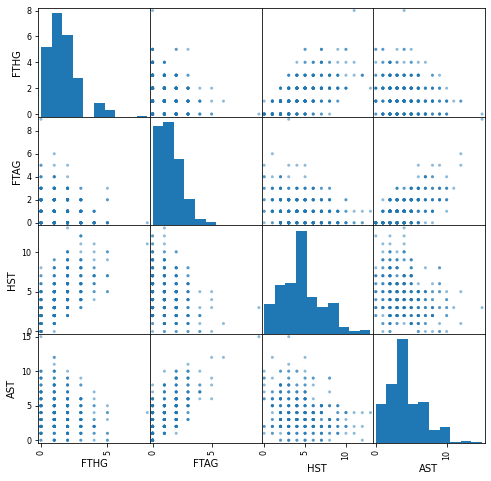

In [11]:
!pip install matplotlib
#to find the relation between two variables we use Scatter matrix
#It can be used to determine whether the variables are correlated and whether the correlation is positive or negative
from pandas.plotting import scatter_matrix

#Premier League 
pandas_df = df.toPandas()
scatter_matrix(pandas_df[['FTHG','FTAG','FTR','HST','AST']], figsize=(8,8))

C:\Users\Aswath\Anaconda3\envs\py38\lib\site-packages\pyspark\sql\pandas\conversion.py:202: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_name] = series


array([[<AxesSubplot:xlabel='FTHG', ylabel='FTHG'>,
        <AxesSubplot:xlabel='FTAG', ylabel='FTHG'>,
        <AxesSubplot:xlabel='HST', ylabel='FTHG'>,
        <AxesSubplot:xlabel='AST', ylabel='FTHG'>],
       [<AxesSubplot:xlabel='FTHG', ylabel='FTAG'>,
        <AxesSubplot:xlabel='FTAG', ylabel='FTAG'>,
        <AxesSubplot:xlabel='HST', ylabel='FTAG'>,
        <AxesSubplot:xlabel='AST', ylabel='FTAG'>],
       [<AxesSubplot:xlabel='FTHG', ylabel='HST'>,
        <AxesSubplot:xlabel='FTAG', ylabel='HST'>,
        <AxesSubplot:xlabel='HST', ylabel='HST'>,
        <AxesSubplot:xlabel='AST', ylabel='HST'>],
       [<AxesSubplot:xlabel='FTHG', ylabel='AST'>,
        <AxesSubplot:xlabel='FTAG', ylabel='AST'>,
        <AxesSubplot:xlabel='HST', ylabel='AST'>,
        <AxesSubplot:xlabel='AST', ylabel='AST'>]], dtype=object)

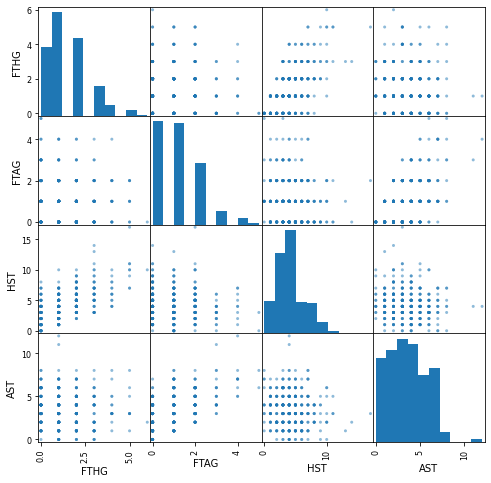

In [12]:
#Laliga
df= my_spark.read.format("mongo").option("uri","mongodb://127.0.0.1/LeagueStats.LaLiga2020").load()
pandas_df = df.toPandas()
scatter_matrix(pandas_df[['FTHG','FTAG','FTR','HST','AST']], figsize=(8,8))

array([[<AxesSubplot:xlabel='FTHG', ylabel='FTHG'>,
        <AxesSubplot:xlabel='FTAG', ylabel='FTHG'>,
        <AxesSubplot:xlabel='HST', ylabel='FTHG'>,
        <AxesSubplot:xlabel='AST', ylabel='FTHG'>],
       [<AxesSubplot:xlabel='FTHG', ylabel='FTAG'>,
        <AxesSubplot:xlabel='FTAG', ylabel='FTAG'>,
        <AxesSubplot:xlabel='HST', ylabel='FTAG'>,
        <AxesSubplot:xlabel='AST', ylabel='FTAG'>],
       [<AxesSubplot:xlabel='FTHG', ylabel='HST'>,
        <AxesSubplot:xlabel='FTAG', ylabel='HST'>,
        <AxesSubplot:xlabel='HST', ylabel='HST'>,
        <AxesSubplot:xlabel='AST', ylabel='HST'>],
       [<AxesSubplot:xlabel='FTHG', ylabel='AST'>,
        <AxesSubplot:xlabel='FTAG', ylabel='AST'>,
        <AxesSubplot:xlabel='HST', ylabel='AST'>,
        <AxesSubplot:xlabel='AST', ylabel='AST'>]], dtype=object)

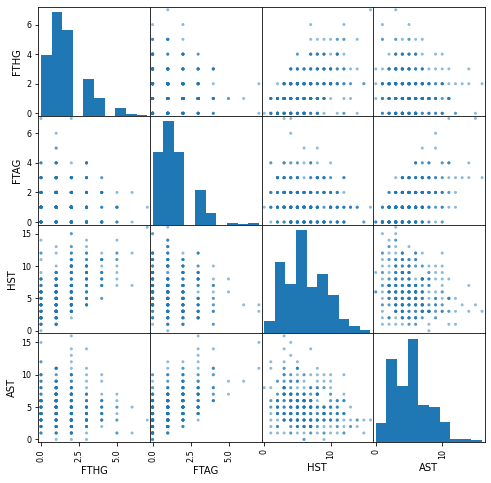

In [13]:
#Serie-A
df= my_spark.read.format("mongo").option("uri","mongodb://127.0.0.1/LeagueStats.SerieA2020").load()
pandas_df = df.toPandas()
scatter_matrix(pandas_df[['FTHG','FTAG','FTR','HST','AST']], figsize=(8,8))

From the Scatter Matrices,We can observe that
- The Scatter Graph between HST (Home Shot on Target) and FTHG (Full Time Home Goal) has a positive slope (positive Correlation)
- The Scatter Graph between AST (Away Shot on Target) and FTAG (Full Time Away Goal) has a positive slope (positive Correlation)
- The Scatter Graph between AST (Away Shot on Target) and HST (Home Shot on Target) has a negative slope (negative Correlation)


So, we can understand that HST , FTHG , AST and FTAG are some factors influencing a match's result

## Predicting scores through Poisson Regression

Poisson distribution can be used to measure the probability of independent events occurring a certain number of times within a set period - such as the number of goals scored in a football match.

We do not need information about division,date and referee from various companies for this method.We just need team's attacking strength and defensive strength for prediction.Poisson regression helps us to predict a fixture.We can simulate for all fixtures 
to get the points table for the season.

In [14]:
#Calculating Home Attacking Strength,Home Defensive Strength,Away Attacking Strength,Away Defensive Strength of Each Team
def calculate_AS_DS(df): 
    
    no_of_teams = df.select('HomeTeam').distinct().count()
    
    avg_home_goal_scored = df.groupBy().sum('FTHG').collect()[0][0]/((no_of_teams-1)*no_of_teams)
    avg_away_goal_scored = df.groupBy().sum('FTAG').collect()[0][0]/((no_of_teams-1)*no_of_teams)

    avg_home_goal_conceded = avg_away_goal_scored
    avg_away_goal_conceded = avg_home_goal_scored

    #calculating home attacking strength
    avg_has = df.groupBy('HomeTeam').sum('FTHG')
    avg_has = avg_has.withColumnRenamed('sum(FTHG)','HGS')
    avg_has = avg_has.withColumn('HAS',avg_has['HGS']/((no_of_teams-1)*avg_home_goal_scored))

    #calculating home defensive strength
    avg_hds = df.groupBy('HomeTeam').sum('FTAG')
    avg_hds = avg_hds.withColumnRenamed('sum(FTAG)','HGC')
    avg_hds = avg_hds.withColumnRenamed('HomeTeam','Team')
    avg_hds = avg_hds.withColumn('HDS',avg_hds['HGC']/((no_of_teams-1)*avg_home_goal_conceded))

    #appending avg_hds with avg_has
    avg_has=avg_has.join(avg_hds,avg_has.HomeTeam == avg_hds.Team,"inner")
    avg_has=avg_has.drop('Team')

    #calculating away attacking strength
    avg_aas = df.groupBy('AwayTeam').sum('FTAG')
    avg_aas = avg_aas.withColumnRenamed('sum(FTAG)','AGS')
    avg_aas = avg_aas.withColumn('AAS',avg_aas['AGS']/((no_of_teams-1)*avg_away_goal_scored))

    #appending avg_aas with avg_has
    avg_has=avg_has.join(avg_aas,avg_has.HomeTeam == avg_aas.AwayTeam,"inner")
    avg_has=avg_has.drop('AwayTeam')

    #calculating away defensive strength
    avg_ads = df.groupBy('AwayTeam').sum('FTHG')
    avg_ads = avg_ads.withColumnRenamed('sum(FTHG)','AGC')
    avg_ads = avg_ads.withColumnRenamed('AwayTeam','Team')
    avg_ads = avg_ads.withColumn('ADS',avg_ads['AGC']/((no_of_teams-1)*avg_away_goal_conceded))

    #appending avg_ads with avg_has and renaming avg_has as Team_Stats
    avg_has=avg_has.join(avg_ads,avg_has.HomeTeam == avg_ads.Team,"inner")
    Team_Stats=avg_has.drop('Team')
    Team_Stats = Team_Stats.withColumnRenamed('HomeTeam','Team')
    return Team_Stats

In [15]:
!pip install scipy
import scipy.stats as spy
def expected_goals(xG):
    ret = []
    for i in range(0,6):
        pmf = spy.poisson.pmf(i,xG)
        ret.append(pmf)
    return ret

In [16]:
def GoalsScored(df):
    no_of_teams = df.select('HomeTeam').distinct().count()
    avg_home_goal_scored = df.groupBy().sum('FTHG').collect()[0][0]/((no_of_teams-1)*no_of_teams)
    avg_away_goal_scored = df.groupBy().sum('FTAG').collect()[0][0]/((no_of_teams-1)*no_of_teams)
    return avg_home_goal_scored,avg_away_goal_scored

In [17]:
from tabulate import tabulate
def ComputePoissonDistribution(h_team,a_team,ts,ahgs,aags):
    h_team_hs = ts.filter(ts['Team']==h_team).select(["HAS","HDS"])
    a_team_as = ts.filter(ts['Team']==a_team).select(["AAS","ADS"])
    
    hxG = h_team_hs.collect()[0][0]*a_team_as.collect()[0][1]*ahgs
    axG = a_team_as.collect()[0][0]*h_team_hs.collect()[0][1]*aags
    
    expected_hg = expected_goals(hxG)
    expected_ag = expected_goals(axG)

    lst=[]
    for i in range(len(expected_hg)):
        l=[i]
        for j in range(len(expected_ag)):
            l.append(expected_hg[i]*expected_ag[j])
        lst.append(l)
    print("Probabilites of Each Score(row headers are away team goals and column headers are home team goals)\n")     
    print(tabulate(lst,headers = [" ","0","1","2","3","4","5"],tablefmt='orgtbl'))
    
    drawPercent = 0
    HomeWinPercent = 0
    AwayWinPercent = 0

    for i in range(0,len(lst)):
        for j in range(1,len(lst[0])):
            if(i==j):
                drawPercent = drawPercent+lst[i][j]
            elif i>j:
                AwayWinPercent = AwayWinPercent+lst[i][j]
            else:
                HomeWinPercent = HomeWinPercent+lst[i][j]

    print("\nPercentage of  Draw : ",drawPercent*100,"\nPercentage of ",h_team," Win : ",HomeWinPercent*100,"\nPercentage of ",a_team," Win : ",AwayWinPercent*100)

    print("\n")
    if(drawPercent > max(HomeWinPercent,AwayWinPercent)):
        print("Draw")
    elif (HomeWinPercent>AwayWinPercent):
        print(h_team," wins")
    else:
        print(a_team," wins")
    

In [18]:
df = my_spark.read.format("mongo").option("uri","mongodb://127.0.0.1/LeagueStats.PL2021").load()
ahgs,aags = GoalsScored(df)
ComputePoissonDistribution("Man City","Liverpool",calculate_AS_DS(df),ahgs,aags)


Probabilites of Each Score(row headers are away team goals and column headers are home team goals)

|     |          0 |         1 |          2 |          3 |          4 |           5 |
|-----+------------+-----------+------------+------------+------------+-------------|
|   0 | 0.0366715  | 0.0501821 | 0.0343351  | 0.0156616  | 0.00535793 | 0.00146638  |
|   1 | 0.071045   | 0.0972194 | 0.0665186  | 0.0303418  | 0.0103801  | 0.00284087  |
|   2 | 0.0688189  | 0.0941733 | 0.0644343  | 0.0293911  | 0.0100548  | 0.00275185  |
|   3 | 0.0444417  | 0.060815  | 0.0416103  | 0.0189801  | 0.0064932  | 0.00177709  |
|   4 | 0.0215246  | 0.0294547 | 0.0201532  | 0.00919271 | 0.00314487 | 0.000860702 |
|   5 | 0.00834007 | 0.0114127 | 0.00780871 | 0.00356187 | 0.00121853 | 0.000333493 |

Percentage of  Draw :  21.72397383716124 
Percentage of  Man City  Win :  48.91970531278666 
Percentage of  Liverpool  Win :  27.633162314131525


Man City  wins


In [19]:
df = my_spark.read.format("mongo").option("uri","mongodb://127.0.0.1/LeagueStats.LaLiga2021").load()
ahgs,aags = GoalsScored(df)
ComputePoissonDistribution("Real Madrid","Barcelona",calculate_AS_DS(df),ahgs,aags)

Probabilites of Each Score(row headers are away team goals and column headers are home team goals)

|     |          0 |         1 |          2 |          3 |           4 |           5 |
|-----+------------+-----------+------------+------------+-------------+-------------|
|   0 | 0.082236   | 0.106556  | 0.069034   | 0.0298166  | 0.00965858  | 0.00250299  |
|   1 | 0.0988829  | 0.128126  | 0.0830085  | 0.0358523  | 0.0116138   | 0.00300967  |
|   2 | 0.0594498  | 0.0770312 | 0.0499059  | 0.0215549  | 0.00698236  | 0.00180946  |
|   3 | 0.0238281  | 0.0308748 | 0.0200028  | 0.00863942 | 0.0027986   | 0.000725248 |
|   4 | 0.00716289 | 0.0092812 | 0.00601298 | 0.00259707 | 0.000841279 | 0.000218015 |
|   5 | 0.00172257 | 0.002232  | 0.00144604 | 0.00062456 | 0.000202316 | 5.24294e-05 |

Percentage of  Draw :  19.871623301289087 
Percentage of  Real Madrid  Win :  65.49417934745146 
Percentage of  Barcelona  Win :  14.263499847547365


Real Madrid  wins


In [20]:
df = my_spark.read.format("mongo").option("uri","mongodb://127.0.0.1/LeagueStats.SerieA2021").load()
ahgs,aags = GoalsScored(df)
ComputePoissonDistribution("Juventus","Inter",calculate_AS_DS(df),ahgs,aags)

Probabilites of Each Score(row headers are away team goals and column headers are home team goals)

|     |          0 |          1 |          2 |           3 |           4 |           5 |
|-----+------------+------------+------------+-------------+-------------+-------------|
|   0 | 0.0892127  | 0.112274   | 0.0706481  | 0.0296368   | 0.00932446  | 0.00234696  |
|   1 | 0.103329   | 0.13004    | 0.0818272  | 0.0343264   | 0.0107999   | 0.00271833  |
|   2 | 0.0598398  | 0.0753082  | 0.0473876  | 0.019879    | 0.00625443  | 0.00157423  |
|   3 | 0.0231029  | 0.0290749  | 0.0182953  | 0.00767487  | 0.0024147   | 0.000607778 |
|   4 | 0.00668964 | 0.00841889 | 0.00529757 | 0.00222233  | 0.000699197 | 0.000175988 |
|   5 | 0.00154964 | 0.00195021 | 0.00122717 | 0.000514795 | 0.000161967 | 4.0767e-05  |

Percentage of  Draw :  19.93170981217693 
Percentage of  Juventus  Win :  65.98629054138574 
Percentage of  Inter  Win :  13.766545892425706


Juventus  wins


In [21]:
df = my_spark.read.format("mongo").option("uri","mongodb://127.0.0.1/LeagueStats.Bundesliga2021").load()
ahgs,aags = GoalsScored(df)
ComputePoissonDistribution("Bayern Munich","Dortmund",calculate_AS_DS(df),ahgs,aags)

Probabilites of Each Score(row headers are away team goals and column headers are home team goals)

|     |          0 |          1 |          2 |          3 |          4 |           5 |
|-----+------------+------------+------------+------------+------------+-------------|
|   0 | 0.00494324 | 0.00926989 | 0.00869175 | 0.00543312 | 0.00254713 | 0.000955311 |
|   1 | 0.0169774  | 0.0318371  | 0.0298516  | 0.0186599  | 0.00874805 | 0.00328098  |
|   2 | 0.0291542  | 0.0546718  | 0.0512621  | 0.0320434  | 0.0150225  | 0.00563422  |
|   3 | 0.0333764  | 0.0625896  | 0.058686   | 0.036684   | 0.017198   | 0.00645018  |
|   4 | 0.0286575  | 0.0537405  | 0.0503888  | 0.0314975  | 0.0147665  | 0.00553824  |
|   5 | 0.0196847  | 0.036914   | 0.0346118  | 0.0216354  | 0.010143   | 0.00380418  |

Percentage of  Draw :  17.197578515008736 
Percentage of  Bayern Munich  Win :  31.26213142507584 
Percentage of  Dortmund  Win :  37.07527741038135


Dortmund  wins


In [22]:
df = my_spark.read.format("mongo").option("uri","mongodb://127.0.0.1/LeagueStats.Ligue2021").load()
ahgs,aags = GoalsScored(df)
ComputePoissonDistribution("Paris SG","Lille",calculate_AS_DS(df),ahgs,aags)

Probabilites of Each Score(row headers are away team goals and column headers are home team goals)

|     |          0 |          1 |           2 |           3 |           4 |           5 |
|-----+------------+------------+-------------+-------------+-------------+-------------|
|   0 | 0.126076   | 0.129125   | 0.0661239   | 0.0225743   | 0.00578005  | 0.00118396  |
|   1 | 0.131962   | 0.135153   | 0.0692109   | 0.0236282   | 0.00604989  | 0.00123924  |
|   2 | 0.0690614  | 0.0707315  | 0.036221    | 0.0123656   | 0.00316616  | 0.000648545 |
|   3 | 0.0240952  | 0.0246779  | 0.0126373   | 0.0043143   | 0.00110466  | 0.000226274 |
|   4 | 0.00630501 | 0.00645748 | 0.00330682  | 0.00112893  | 0.000289057 | 5.92094e-05 |
|   5 | 0.00131987 | 0.00135179 | 0.000692239 | 0.000236326 | 6.05103e-05 | 1.23947e-05 |

Percentage of  Draw :  21.652053768166212 
Percentage of  Paris SG  Win :  64.45527147040131 
Percentage of  Lille  Win :  13.750402118194813


Paris SG  wins


## Prediction of the final result using Classification Algorithms using Machine Learning 

Instead of trying to predict the scores in a given fixture, we can try to predict the final outcome(home win, draw or away win).The objective would be to compare a model between different leagues

In [23]:
#computing previous year points table for labelling the teams.Why Iam not going for other encoders is,Each year teams 
# in 18,19,20 places gets relegated and new Teams come in their position

from pyspark.sql.types import StructType,StructField, StringType, IntegerType

def ComputePointsTable(df):
    Team_Names=df.select('HomeTeam').distinct().collect()
    no_of_teams = len(Team_Names)
    pointsTable = []
    for team in Team_Names:
        wins = df.filter(((df['HomeTeam']==team.HomeTeam)&(df['FTR']=='H'))|((df['AwayTeam']==team.HomeTeam)&(df['FTR']=='A'))).count() 
        draws = df.filter(((df['HomeTeam']==team.HomeTeam)&(df['FTR']=='D'))|((df['AwayTeam']==team.HomeTeam)&(df['FTR']=='D'))).count()
        loses = 2*(no_of_teams-1)-wins-draws
        points = wins*3+draws
        tup = (team.HomeTeam,wins,draws,loses,points)
        pointsTable.append(tup)

    schema = StructType([ \
        StructField("TeamName",StringType(),True), \
        StructField("Wins",IntegerType(),True), \
        StructField("Draws",IntegerType(),True), \
        StructField("Loses",IntegerType(), True), \
        StructField("Points",IntegerType(), True), \
      ])

    Team_df = my_spark.createDataFrame(data=pointsTable,schema=schema)
    Team_df = Team_df.sort(Team_df.Points.desc())
    labelling_team = {}
    lst=[]
    k=1
    for i in Team_df.collect():
        labelling_team[i.TeamName]=k
        k+=1
    return Team_df,labelling_team

Calculating Home Attacking Strength,Home Defensive Strength,Away Attacking Strength,Away Defensive Strength of Each Team
can be done using calculate_AS_DS() declared above


In [24]:
#preparing our dataframe for performing ML Algorithms
from pyspark.sql import functions as f
from pyspark.sql.types import FloatType

def preparingForTraining(Team_Stats,labelling_team,df):
    
    team_Dict={}
    for i in Team_Stats.collect():
        team_Dict[i[0]]=(i[2],i[4],i[6],i[8])
    
    data = []

    for i in df.select(['HomeTeam','AwayTeam','HST','AST','FTR']).collect():
        lst=[]
        lst.append(labelling_team[i[0]])
        lst.append(labelling_team[i[1]])
        lst.append(team_Dict[i[0]][0])
        lst.append(team_Dict[i[0]][1])
        lst.append(team_Dict[i[1]][2])
        lst.append(team_Dict[i[1]][3])
        lst.append(i[2])
        lst.append(i[3])
        lst.append(i[4])
        data.append(tuple(lst))


    
    schema = StructType([ \
        StructField("HT",IntegerType(),True), \
        StructField("AT",IntegerType(),True), \
        StructField("HAS",FloatType(),True), \
        StructField("HDS",FloatType(), True), \
        StructField("AAS",FloatType(), True), \
        StructField("ADS",FloatType(), True), \
        StructField("HST",IntegerType(), True), \
        StructField("AST",IntegerType(), True), \
        StructField("FTR",StringType(), True), \
      ]) 

    Training_df = my_spark.createDataFrame(data=data,schema=schema) 
    Training_df=Training_df.withColumn('R',f.when((f.col('FTR') == 'H'),1).when((f.col('FTR') == 'A'),2).otherwise(0))
    Training_df=Training_df.drop('FTR')
    return Training_df

    

In [25]:
from pyspark.ml.feature import VectorAssembler
def VectorforTrainingSet(Training_df):
    required_features = ['HT','AT','HAS','HDS','AAS','ADS','HST','AST']
    vector_assembler = VectorAssembler(inputCols=required_features,outputCol = 'features')
    vec_df= vector_assembler.transform(Training_df)
    return vec_df,vector_assembler

In [26]:
#vec_df data is trained using Decision tree classifier model
from pyspark.ml.classification import DecisionTreeClassifier,RandomForestClassifier,NaiveBayes,LogisticRegression
def retDecisionTreeModel(vec_df):
    dt = DecisionTreeClassifier(featuresCol='features',labelCol = 'R',maxDepth = 4)
    dt_Model = dt.fit(vec_df)
    return dt_Model

def retRandomForestModel(vec_df):
    rf = RandomForestClassifier(featuresCol='features',labelCol = 'R')
    rf_Model = rf.fit(vec_df)
    return rf_Model

def retNaiveBayesModel(vec_df):
    nb = NaiveBayes()
    vec_df=vec_df.withColumnRenamed('R','label')
    Model = nb.fit(vec_df)
    return Model

def retLogisticRegressionModel(vec_df):
    lr = LogisticRegression(featuresCol='features',labelCol='R')
    lr_Model = lr.fit(vec_df)
    return lr_Model

#we need to generate test set(Next season) for prediction

In [27]:
#test set generation
def generateTestSet(collection):
    test_df = my_spark.read.format("mongo").option("uri","mongodb://127.0.0.1/LeagueStats."+collection).load()
    Team_Stats = calculate_AS_DS(test_df)
    return test_df,Team_Stats

In [28]:
def preparingForTesting(Team_Stats,test_df,labelling_team):
    team_Dict={}
    for i in Team_Stats.collect():
        team_Dict[i[0]]=(i[2],i[4],i[6],i[8])
    data = []

    no_of_teams = test_df.select('HomeTeam').distinct().count()
    k=0
    for i in test_df.select(['HomeTeam','AwayTeam','HST','AST','FTR']).collect():
        lst=[]
        if labelling_team.get(i[0]) is not None:
            lst.append(labelling_team[i[0]])
        else:
            labelling_team[i[0]]=(no_of_teams-2)+k
            lst.append(labelling_team[i[0]])
            k+=1
        if labelling_team.get(i[1]) is not None:   
            lst.append(labelling_team[i[1]])
        else:
            labelling_team[i[1]]=(no_of_teams-2)+k
            lst.append(labelling_team[i[1]])
            k+=1
        lst.append(team_Dict[i[0]][0])
        lst.append(team_Dict[i[0]][1])
        lst.append(team_Dict[i[1]][2])
        lst.append(team_Dict[i[1]][3])
        lst.append(i[2])
        lst.append(i[3])
        data.append(tuple(lst))

    
    schema = StructType([ \
        StructField("HT",IntegerType(),True), \
        StructField("AT",IntegerType(),True), \
        StructField("HAS",FloatType(),True), \
        StructField("HDS",FloatType(), True), \
        StructField("AAS",FloatType(), True), \
        StructField("ADS",FloatType(), True), \
        StructField("HST",IntegerType(), True), \
        StructField("AST",IntegerType(), True), \
      ]) 

    Training_df = my_spark.createDataFrame(data=data,schema=schema) 

    return Training_df

In [29]:
def vectorForTesting(Training_df,vector_assembler):
    vec_test_df= vector_assembler.transform(Training_df)
    return vec_test_df
    

In [30]:
def retPrediction(Model,vec_test_df):
    y_pred_dt = Model.transform(vec_test_df)
    y_pred_dt=y_pred_dt.withColumn('FTR',f.when(f.col('prediction') == 0 ,'D').when(f.col('prediction') ==1,'H').otherwise('A'))
    return y_pred_dt

In [31]:
def getAccuracy(test_df,y_pred_dt):
    Original_results=test_df.select('FTR').collect()
    predicted_results = y_pred_dt.select('FTR').collect()
    count=0
    for i in range(len(predicted_results)):
        if predicted_results[i][0] == Original_results[i][0]:
            count+=1
    Accuracy = count/380
    return Accuracy
        

In [32]:
def calcRMSE(actual,predicted):
    rmse = 0
    for i in range(len(actual)):
        rmse += ((predicted[i][0]-actual[i][0])**2)
    rmse = rmse/len(actual)
    return (rmse**0.5)

In [33]:
def calculateActualTable(test_df):
    #for calculating rmse first we need to compute PL2020-21 Points table
    Team_Names=test_df.select('HomeTeam').distinct().collect()
    no_of_teams = len(Team_Names)
    pointsTable = []
    for team in Team_Names:
        wins = test_df.filter(((test_df['HomeTeam']==team.HomeTeam)&(test_df['FTR']=='H'))|((test_df['AwayTeam']==team.HomeTeam)&(test_df['FTR']=='A'))).count()
        draws = test_df.filter(((test_df['HomeTeam']==team.HomeTeam)&(test_df['FTR']=='D'))|((test_df['AwayTeam']==team.HomeTeam)&(test_df['FTR']=='D'))).count()
        loses = 2*(no_of_teams-1)-wins-draws
        points = wins*3+draws
        tup = (team.HomeTeam,wins,draws,loses,points)
        pointsTable.append(tup)

    schema = StructType([ \
        StructField("TeamName",StringType(),True), \
        StructField("Wins",IntegerType(),True), \
        StructField("Draws",IntegerType(),True), \
        StructField("Loses",IntegerType(), True), \
        StructField("Points",IntegerType(), True), \
      ])

    real_points_df = my_spark.createDataFrame(data=pointsTable,schema=schema)
    return real_points_df
    

In [34]:
def calculateRMSE(test_df,real_points_df,y_pred_dt,labelling_team):
    
    

    #computing pl2020-21 table based on predicted results
    pointsTable = []
    Team_Names=test_df.select('HomeTeam').distinct().collect()
    no_of_teams = len(Team_Names)
    test_df = y_pred_dt.select(['HT','AT','FTR'])

    for team in Team_Names:
        team_no = labelling_team[team[0]]
        wins = test_df.filter(((test_df['HT']== team_no)&(test_df['FTR']=='H'))|((test_df['AT']==team_no)&(test_df['FTR']=='A'))).count()    
        draws = test_df.filter(((test_df['HT']==team_no)&(test_df['FTR']=='D'))|((test_df['AT']==team_no)&(test_df['FTR']=='D'))).count()
        loses = 2*(no_of_teams-1)-wins-draws
        points = wins*3+draws
        tup = (team.HomeTeam,wins,draws,loses,points)
        pointsTable.append(tup)
    
    schema = StructType([ \
        StructField("TeamName",StringType(),True), \
        StructField("Wins",IntegerType(),True), \
        StructField("Draws",IntegerType(),True), \
        StructField("Loses",IntegerType(), True), \
        StructField("Points",IntegerType(), True), \
      ])
    
    predicted_points_df = my_spark.createDataFrame(data=pointsTable,schema=schema)
    predicted_points_df.sort(predicted_points_df.Points.desc()).show()
    
    RMSE = calcRMSE(real_points_df.select('Points').collect(),predicted_points_df.select('Points').collect())

    return RMSE

In [35]:
def computeMLForLeagues(df,coll):
    Team_df,labelling_team = ComputePointsTable(df)
    Team_Stats = calculate_AS_DS(df)
    Training_df = preparingForTraining(Team_Stats,labelling_team,df)
    vec_df,vector_assembler = VectorforTrainingSet(Training_df)
    DecisionTreeModel = retDecisionTreeModel(vec_df)
    RandomForestModel = retRandomForestModel(vec_df)
    NaiveBayesModel = retNaiveBayesModel(vec_df)
    LogisticRegressionModel = retLogisticRegressionModel(vec_df)

    test_df,Team_Stats = generateTestSet(coll)
    Training_df = preparingForTesting(Team_Stats,test_df,labelling_team)
    vec_test_df = vectorForTesting(Training_df,vector_assembler)
    y_pred_dt = retPrediction(DecisionTreeModel,vec_test_df) 
    y_pred_rf = retPrediction(RandomForestModel,vec_test_df)
    y_pred_nb = retPrediction(NaiveBayesModel,vec_test_df)
    y_pred_lr = retPrediction(LogisticRegressionModel,vec_test_df)
    Accuracy_dt = getAccuracy(test_df,y_pred_dt)
    Accuracy_rf = getAccuracy(test_df,y_pred_rf)
    Accuracy_nb = getAccuracy(test_df,y_pred_nb)
    Accuracy_lr = getAccuracy(test_df,y_pred_lr)
    actual_p_table = calculateActualTable(test_df)
    print(" 2020-21 Points table using DecisionTreeClassifier")
    rmse_dt = calculateRMSE(test_df,actual_p_table,y_pred_dt,labelling_team)
    print(" 2020-21 Points table using RandomForestClassifier")
    rmse_rf = calculateRMSE(test_df,actual_p_table,y_pred_rf,labelling_team)
    print(" 2020-21 Points table using NaiveBayesClassifier")
    rmse_nb = calculateRMSE(test_df,actual_p_table,y_pred_nb,labelling_team)
    print(" 2020-21 Points table using LogisticRegressionClassifier")
    rmse_lr = calculateRMSE(test_df,actual_p_table,y_pred_lr,labelling_team)
    return Accuracy_dt,Accuracy_rf,Accuracy_nb,Accuracy_lr,rmse_dt,rmse_rf,rmse_nb,rmse_lr

# Premier League

### 2019-20 Points Table

|        TeamName|Wins|Draws|Loses|Points| 
| --- | --- | --- | --- | --- |
|       Liverpool|  32|    3|    3|    99|
|        Man City|  26|    3|    9|    81| 
|      Man United|  18|   12|    8|    66| 
|         Chelsea|  20|    6|   12|    66| 
|       Leicester|  18|    8|   12|    62| 
|          Wolves|  15|   14|    9|    59| 
|       Tottenham|  16|   11|   11|    59| 
|         Arsenal|  14|   14|   10|    56| 
|Sheffield United|  14|   12|   12|    54| 
|         Burnley|  15|    9|   14|    54| 
|     Southampton|  15|    7|   16|    52| 
|         Everton|  13|   10|   15|    49| 
|       Newcastle|  11|   11|   16|    44| 
|  Crystal Palace|  11|   10|   17|    43| 
|        Brighton|   9|   14|   15|    41| 
|        West Ham|  10|    9|   19|    39| 
|     Aston Villa|   9|    8|   21|    35| 
|     Bournemouth|   9|    7|   22|    34| 
|         Watford|   8|   10|   20|    34| 
|         Norwich|   5|    6|   27|    21| 

### 2020-21 Actual Points Table


|        TeamName|Wins|Draws|Loses|Points| 
| --- | --- | --- | --- | --- |
|        Man City|  27|    5|    6|    86| 
|      Man United|  21|   11|    6|    74| 
|       Liverpool|  20|    9|    9|    69| 
|         Chelsea|  19|   10|    9|    67| 
|       Leicester|  20|    6|   12|    66| 
|        West Ham|  19|    8|   11|    65| 
|       Tottenham|  18|    8|   12|    62| 
|         Arsenal|  18|    7|   13|    61| 
|         Everton|  17|    8|   13|    59| 
|           Leeds|  18|    5|   15|    59| 
|     Aston Villa|  16|    7|   15|    55| 
|          Wolves|  12|    9|   17|    45| 
|       Newcastle|  12|    9|   17|    45| 
|  Crystal Palace|  12|    8|   18|    44| 
|     Southampton|  12|    7|   19|    43| 
|        Brighton|   9|   14|   15|    41| 
|         Burnley|  10|    9|   19|    39| 
|          Fulham|   5|   13|   20|    28| 
|       West Brom|   5|   11|   22|    26| 
|Sheffield United|   7|    2|   29|    23| 

In [36]:
Results = []
df = my_spark.read.format("mongo").option("uri","mongodb://127.0.0.1/LeagueStats.PL2020").load()
Accuracy_dt,Accuracy_rf,Accuracy_nb,Accuracy_lr,rmse_dt,rmse_rf,rmse_nb,rmse_lr =computeMLForLeagues(df,"PL2021")
lst = []
lst.append("Premier League")
lst.append(Accuracy_dt)
lst.append(Accuracy_rf)
lst.append(Accuracy_nb)
lst.append(Accuracy_lr)
lst.append(rmse_dt)
lst.append(rmse_rf)
lst.append(rmse_nb)
lst.append(rmse_lr)
Results.append(lst)

 2020-21 Points table using DecisionTreeClassifier
+----------------+----+-----+-----+------+
|        TeamName|Wins|Draws|Loses|Points|
+----------------+----+-----+-----+------+
|        Man City|  26|   10|    2|    88|
|       Liverpool|  23|   12|    3|    81|
|      Man United|  16|   20|    2|    68|
|       Leicester|  16|   19|    3|    67|
|         Chelsea|  16|   16|    6|    64|
|         Everton|  11|   21|    6|    54|
|         Arsenal|  10|   21|    7|    51|
|     Southampton|  11|   18|    9|    51|
|       Tottenham|  11|   17|   10|    50|
|        Brighton|   8|   23|    7|    47|
|          Wolves|   8|   23|    7|    47|
|  Crystal Palace|   6|   24|    8|    42|
|       Newcastle|   6|   22|   10|    40|
|         Burnley|   7|   17|   14|    38|
|        West Ham|   7|   16|   15|    37|
|           Leeds|   8|   13|   17|    37|
|     Aston Villa|   6|   13|   19|    31|
|Sheffield United|   3|   21|   14|    30|
|          Fulham|   5|   13|   20|    28|
|  

# La Liga

### 2019-20 Points Table

|   TeamName|Wins|Draws|Loses|Points|
| --- | --- | --- | --- | --- |
|Real Madrid|  26|    9|    3|    87|
|  Barcelona|  25|    7|    6|    82|
| Ath Madrid|  18|   16|    4|    70|
|    Sevilla|  19|   13|    6|    70|
| Villarreal|  18|    6|   14|    60|
|   Sociedad|  16|    8|   14|    56|
|    Granada|  16|    8|   14|    56|
|     Getafe|  14|   12|   12|    54|
|   Valencia|  14|   11|   13|    53|
|    Osasuna|  13|   13|   12|    52|
| Ath Bilbao|  13|   12|   13|    51|
|    Levante|  14|    7|   17|    49|
|      Eibar|  11|    9|   18|    42|
| Valladolid|   9|   15|   14|    42|
|      Betis|  10|   11|   17|    41|
|     Alaves|  10|    9|   19|    39|
|      Celta|   7|   16|   15|    37|
|    Leganes|   8|   12|   18|    36|
|   Mallorca|   9|    6|   23|    33|
|    Espanol|   5|   10|   23|    25|

### 2020-21 Actual Points Table

|   TeamName|Wins|Draws|Loses|Points|
| --- | --- | --- | --- | --- |
| Ath Madrid|  26|    8|    4|    86|
|Real Madrid|  25|    9|    4|    84|
|  Barcelona|  24|    7|    7|    79|
|    Sevilla|  24|    5|    9|    77|
|   Sociedad|  17|   11|   10|    62|
|      Betis|  17|   10|   11|    61|
| Villarreal|  15|   13|   10|    58|
|      Celta|  14|   11|   13|    53|
| Ath Bilbao|  11|   13|   14|    46|
|    Granada|  13|    7|   18|    46|
|      Cadiz|  11|   11|   16|    44|
|    Osasuna|  11|   11|   16|    44|
|   Valencia|  10|   13|   15|    43|
|    Levante|   9|   14|   15|    41|
|     Getafe|   9|   11|   18|    38|
|     Alaves|   9|   11|   18|    38|
|      Elche|   8|   12|   18|    36|
|     Huesca|   7|   13|   18|    34|
| Valladolid|   5|   16|   17|    31|
|      Eibar|   6|   12|   20|    30|


In [37]:
df = my_spark.read.format("mongo").option("uri","mongodb://127.0.0.1/LeagueStats.LaLiga2020").load()
Accuracy_dt,Accuracy_rf,Accuracy_nb,Accuracy_lr,rmse_dt,rmse_rf,rmse_nb,rmse_lr = computeMLForLeagues(df,"LaLiga2021")
lst = []
lst.append("La Liga")
lst.append(Accuracy_dt)
lst.append(Accuracy_rf)
lst.append(Accuracy_nb)
lst.append(Accuracy_lr)
lst.append(rmse_dt)
lst.append(rmse_rf)
lst.append(rmse_nb)
lst.append(rmse_lr)
Results.append(lst)

 2020-21 Points table using DecisionTreeClassifier
+-----------+----+-----+-----+------+
|   TeamName|Wins|Draws|Loses|Points|
+-----------+----+-----+-----+------+
|  Barcelona|  25|    8|    5|    83|
|   Sociedad|  21|   11|    6|    74|
|Real Madrid|  20|   13|    5|    73|
| Villarreal|  21|    9|    8|    72|
| Ath Madrid|  16|   16|    6|    64|
|    Sevilla|  16|   12|   10|    60|
|     Getafe|  15|   12|   11|    57|
|      Betis|  18|    2|   18|    56|
|    Levante|  17|    4|   17|    55|
| Ath Bilbao|  16|    5|   17|    53|
|   Valencia|  15|    8|   15|    53|
|    Osasuna|  13|   12|   13|    51|
|    Granada|  13|    8|   17|    47|
|      Eibar|  14|    5|   19|    47|
|      Celta|  13|    7|   18|    46|
|     Alaves|  11|    5|   22|    38|
|     Huesca|   9|    8|   21|    35|
| Valladolid|  10|    5|   23|    35|
|      Cadiz|  10|    5|   23|    35|
|      Elche|   7|    5|   26|    26|
+-----------+----+-----+-----+------+

 2020-21 Points table using RandomFo

# Serie-A

### 2019-20 Points Table

|  TeamName|Wins|Draws|Loses|Points|
| --- | --- | --- | --- | --- |
|  Juventus|  26|    5|    7|    83|
|     Inter|  24|   10|    4|    82|
|     Lazio|  24|    6|    8|    78|
|  Atalanta|  23|    9|    6|    78|
|      Roma|  21|    7|   10|    70|
|     Milan|  19|    9|   10|    66|
|    Napoli|  18|    8|   12|    62|
|  Sassuolo|  14|    9|   15|    51|
|    Verona|  12|   13|   13|    49|
|Fiorentina|  12|   13|   13|    49|
|     Parma|  14|    7|   17|    49|
|   Bologna|  12|   11|   15|    47|
|  Cagliari|  11|   12|   15|    45|
|   Udinese|  12|    9|   17|    45|
| Sampdoria|  12|    6|   20|    42|
|    Torino|  11|    7|   20|    40|
|     Genoa|  10|    9|   19|    39|
|     Lecce|   9|    8|   21|    35|
|   Brescia|   6|    7|   25|    25|
|      Spal|   5|    5|   28|    20|

### 2020-21 Actual Points Table

|  TeamName|Wins|Draws|Loses|Points|
| --- | --- | --- | --- | --- |
|     Inter|  28|    7|    3|    91|
|     Milan|  24|    7|    7|    79|
|  Atalanta|  23|    9|    6|    78|
|  Juventus|  23|    9|    6|    78|
|    Napoli|  24|    5|    9|    77|
|     Lazio|  21|    5|   12|    68|
|      Roma|  18|    9|   11|    63|
|  Sassuolo|  17|   11|   10|    62|
| Sampdoria|  15|    7|   16|    52|
|    Verona|  10|   13|   15|    43|
|     Genoa|  10|   12|   16|    42|
|   Bologna|  10|   11|   17|    41|
|Fiorentina|   9|   13|   16|    40|
|   Udinese|  10|   10|   18|    40|
|    Spezia|   9|   12|   17|    39|
|  Cagliari|   9|   10|   19|    37|
|    Torino|   7|   16|   15|    37|
| Benevento|   7|   12|   19|    33|
|   Crotone|   6|    5|   27|    23|
|     Parma|   3|   11|   24|    20|

In [38]:
df = my_spark.read.format("mongo").option("uri","mongodb://127.0.0.1/LeagueStats.SerieA2020").load()
Accuracy_dt,Accuracy_rf,Accuracy_nb,Accuracy_lr,rmse_dt,rmse_rf,rmse_nb,rmse_lr = computeMLForLeagues(df,"SerieA2021")
lst = []
lst.append("Serie-A")
lst.append(Accuracy_dt)
lst.append(Accuracy_rf)
lst.append(Accuracy_nb)
lst.append(Accuracy_lr)
lst.append(rmse_dt)
lst.append(rmse_rf)
lst.append(rmse_nb)
lst.append(rmse_lr)
Results.append(lst)

 2020-21 Points table using DecisionTreeClassifier
+----------+----+-----+-----+------+
|  TeamName|Wins|Draws|Loses|Points|
+----------+----+-----+-----+------+
|  Atalanta|  34|    3|    1|   105|
|     Inter|  32|    2|    4|    98|
|    Napoli|  28|    3|    7|    87|
|  Juventus|  26|    5|    7|    83|
|     Milan|  24|    5|    9|    77|
|      Roma|  24|    1|   13|    73|
|     Lazio|  21|    3|   14|    66|
|   Udinese|  17|    4|   17|    55|
|  Sassuolo|  14|   10|   14|    52|
|    Torino|  15|    4|   19|    49|
|    Verona|  15|    3|   20|    48|
|Fiorentina|  10|   10|   18|    40|
|     Genoa|  10|    8|   20|    38|
| Sampdoria|  10|    5|   23|    35|
|   Bologna|   8|   10|   20|    34|
| Benevento|   9|    7|   22|    34|
|    Spezia|   8|    8|   22|    32|
|  Cagliari|   7|    8|   23|    29|
|   Crotone|   7|    8|   23|    29|
|     Parma|   5|    5|   28|    20|
+----------+----+-----+-----+------+

 2020-21 Points table using RandomForestClassifier
+--------

# Bundesliga

### 2019-20 Points Table
|          TeamName|Wins|Draws|Loses|Points|
| --- | --- | --- | --- | --- |
|     Bayern Munich|  26|    4|    4|    82|
|          Dortmund|  21|    6|    7|    69|
|        RB Leipzig|  18|   12|    4|    66|
|        M'gladbach|  20|    5|    9|    65|
|        Leverkusen|  19|    6|    9|    63|
|        Hoffenheim|  15|    7|   12|    52|
|         Wolfsburg|  13|   10|   11|    49|
|          Freiburg|  13|    9|   12|    48|
|     Ein Frankfurt|  13|    6|   15|    45|
|      Union Berlin|  12|    5|   17|    41|
|            Hertha|  11|    8|   15|    41|
|        Schalke 04|   9|   12|   13|    39|
|             Mainz|  11|    4|   19|    37|
|          Augsburg|   9|    9|   16|    36|
|           FC Koln|  10|    6|   18|    36|
|     Werder Bremen|   8|    7|   19|    31|
|Fortuna Dusseldorf|   6|   12|   16|    30|
|         Paderborn|   4|    8|   22|    20|

### 2020-21 Actual Points Table

|     TeamName|Wins|Draws|Loses|Points|
| --- | --- | --- | --- | --- |
|Bayern Munich|  24|    6|    4|    78|
|   RB Leipzig|  19|    8|    7|    65|
|     Dortmund|  20|    4|   10|    64|
|    Wolfsburg|  17|   10|    7|    61|
|Ein Frankfurt|  16|   12|    6|    60|
|   Leverkusen|  14|   10|   10|    52|
| Union Berlin|  12|   14|    8|    50|
|   M'gladbach|  13|   10|   11|    49|
|    Stuttgart|  12|    9|   13|    45|
|     Freiburg|  12|    9|   13|    45|
|   Hoffenheim|  11|   10|   13|    43|
|        Mainz|  10|    9|   15|    39|
|     Augsburg|  10|    6|   18|    36|
|    Bielefeld|   9|    8|   17|    35|
|       Hertha|   8|   11|   15|    35|
|      FC Koln|   8|    9|   17|    33|
|Werder Bremen|   7|   10|   17|    31|
|   Schalke 04|   3|    7|   24|    16|

In [39]:
df = my_spark.read.format("mongo").option("uri","mongodb://127.0.0.1/LeagueStats.Bundesliga2020").load()
Accuracy_dt,Accuracy_rf,Accuracy_nb,Accuracy_lr,rmse_dt,rmse_rf,rmse_nb,rmse_lr = computeMLForLeagues(df,"Bundesliga2021")
lst = []
lst.append("Bundesliga")
lst.append(Accuracy_dt)
lst.append(Accuracy_rf)
lst.append(Accuracy_nb)
lst.append(Accuracy_lr)
lst.append(rmse_dt)
lst.append(rmse_rf)
lst.append(rmse_nb)
lst.append(rmse_lr)
Results.append(lst)

 2020-21 Points table using DecisionTreeClassifier
+-------------+----+-----+-----+------+
|     TeamName|Wins|Draws|Loses|Points|
+-------------+----+-----+-----+------+
|   RB Leipzig|  29|    1|    4|    88|
|Bayern Munich|  29|    0|    5|    87|
|     Dortmund|  28|    1|    5|    85|
|    Wolfsburg|  26|    1|    7|    79|
|   M'gladbach|  25|    0|    9|    75|
|Werder Bremen|  19|    9|    6|    66|
|    Bielefeld|  19|    9|    6|    66|
|Ein Frankfurt|  22|    0|   12|    66|
|    Stuttgart|  18|    0|   16|    54|
|   Hoffenheim|  17|    1|   16|    52|
|     Freiburg|  17|    0|   17|    51|
|   Leverkusen|  15|    2|   17|    47|
|       Hertha|  12|    0|   22|    36|
| Union Berlin|  11|    2|   21|    35|
|     Augsburg|  10|    4|   20|    34|
|        Mainz|  10|    3|   21|    33|
|      FC Koln|   2|    3|   29|     9|
|   Schalke 04|   1|    3|   30|     6|
+-------------+----+-----+-----+------+

 2020-21 Points table using RandomForestClassifier
+-------------+--

# Ligue-1

### 2019-20 Points Table

|   TeamName|Wins|Draws|Loses|Points|
| --- | --- | --- | --- | --- |
|   Paris SG|  22|    2|   14|    68|
|  Marseille|  16|    8|   14|    56|
|     Rennes|  15|    5|   18|    50|
|      Lille|  15|    4|   19|    49|
|       Nice|  11|    8|   19|    41|
|      Reims|  10|   11|   17|    41|
|Montpellier|  11|    7|   20|    40|
|       Lyon|  11|    7|   20|    40|
|     Monaco|  11|    7|   20|    40|
|     Angers|  11|    6|   21|    39|
| Strasbourg|  11|    5|   22|    38|
|     Nantes|  11|    4|   23|    37|
|   Bordeaux|   9|   10|   19|    37|
|      Brest|   8|   10|   20|    34|
|       Metz|   8|   10|   20|    34|
|      Dijon|   7|    9|   22|    30|
| St Etienne|   8|    6|   24|    30|
|      Nimes|   7|    6|   25|    27|
|     Amiens|   4|   11|   23|    23|
|   Toulouse|   3|    4|   31|    13|

### 2020-21 Actual Points Table

|   TeamName|Wins|Draws|Loses|Points|
| --- | --- | --- | --- | --- |
|      Lille|  24|   11|    3|    83|
|   Paris SG|  26|    4|    8|    82|
|     Monaco|  24|    6|    8|    78|
|       Lyon|  22|   10|    6|    76|
|  Marseille|  16|   12|   10|    60|
|     Rennes|  16|   10|   12|    58|
|       Lens|  15|   12|   11|    57|
|Montpellier|  14|   12|   12|    54|
|       Nice|  15|    7|   16|    52|
|       Metz|  12|   11|   15|    47|
| St Etienne|  12|   10|   16|    46|
|   Bordeaux|  13|    6|   19|    45|
|     Angers|  12|    8|   18|    44|
|      Reims|   9|   15|   14|    42|
| Strasbourg|  11|    9|   18|    42|
|    Lorient|  11|    9|   18|    42|
|      Brest|  11|    8|   19|    41|
|     Nantes|   9|   13|   16|    40|
|      Nimes|   9|    8|   21|    35|
|      Dijon|   4|    9|   25|    21|

In [40]:
df = my_spark.read.format("mongo").option("uri","mongodb://127.0.0.1/LeagueStats.Ligue2020").load()
Accuracy_dt,Accuracy_rf,Accuracy_nb,Accuracy_lr,rmse_dt,rmse_rf,rmse_nb,rmse_lr = computeMLForLeagues(df,"Ligue2021")
lst = []
lst.append("Ligue-1")
lst.append(Accuracy_dt)
lst.append(Accuracy_rf)
lst.append(Accuracy_nb)
lst.append(Accuracy_lr)
lst.append(rmse_dt)
lst.append(rmse_rf)
lst.append(rmse_nb)
lst.append(rmse_lr)
Results.append(lst)

 2020-21 Points table using DecisionTreeClassifier
+-----------+----+-----+-----+------+
|   TeamName|Wins|Draws|Loses|Points|
+-----------+----+-----+-----+------+
|       Lyon|  28|    1|    9|    85|
|     Monaco|  27|    3|    8|    84|
|      Lille|  22|    8|    8|    74|
|   Paris SG|  23|    4|   11|    73|
|     Rennes|  21|    4|   13|    67|
|  Marseille|  20|    1|   17|    61|
| St Etienne|  19|    3|   16|    60|
|     Angers|  17|    8|   13|    59|
|       Metz|  19|    2|   17|    59|
| Strasbourg|  18|    3|   17|    57|
|      Brest|  18|    3|   17|    57|
|     Nantes|  16|    4|   18|    52|
|   Bordeaux|  14|    8|   16|    50|
|    Lorient|  15|    5|   18|    50|
|      Nimes|  15|    5|   18|    50|
|       Nice|  15|    4|   19|    49|
|      Reims|  13|   10|   15|    49|
|Montpellier|  15|    2|   21|    47|
|      Dijon|  10|    3|   25|    33|
|       Lens|   9|    6|   23|    33|
+-----------+----+-----+-----+------+

 2020-21 Points table using RandomFo

In [41]:
!pip install tabulate

In [42]:
from tabulate import tabulate
for i in range(len(Results)):
    print("Results from ",Results[i][0])
    print("---------------------------")
    print(tabulate([["Decision Tree ",round(Results[i][1]*100,1),round(Results[i][5],2)],["Random Forest ",round(Results[i][2]*100,1),round(Results[i][6],2)],["Naive Bayes   " ,round(Results[i][3]*100,1),round(Results[i][7],2)],["Logistic Regression ",round(Results[i][4]*100,1),round(Results[i][8],1)]],headers = ["Classifier","AccuracyM","RMSE"],tablefmt='orgtbl'))
    print("\n")
    if Results[i][1] == max(Results[i][1],max(Results[i][2],max(Results[i][3],Results[i][4]))):
        print(" The results generated by Decision Tree Classifier has the better Accuracy than other Classifiers(",Results[i][1]*100,") in ",Results[i][0])
    elif Results[i][2] == max(Results[i][1],max(Results[i][2],max(Results[i][3],Results[i][4]))):
        print(" The results generated by Random Forest Classifier has the better Accuracy than other Classifiers(",Results[i][2]*100,") in ",Results[i][0])
    elif Results[i][3] == max(Results[i][1],max(Results[i][2],max(Results[i][3],Results[i][4]))):
        print(" The results generated by Naive Bayes Classifier has the better Accuracy than other Classifiers(",Results[i][3]*100,") in ",Results[i][0])
    else:
        print(" The results generated by Logistic Regression Classifier has the better Accuracy than other Classifiers(",Results[i][1]*100,") in ",Results[i][0])    

Results from  Premier League
---------------------------
| Classifier          |   AccuracyM |   RMSE |
|---------------------+-------------+--------|
| Decision Tree       |        43.7 |  11.38 |
| Random Forest       |        53.4 |  11.69 |
| Naive Bayes         |        53.2 |  23.42 |
| Logistic Regression |        57.9 |  12    |


 The results generated by Logistic Regression Classifier has the better Accuracy than other Classifiers( 43.684210526315795 ) in  Premier League
Results from  La Liga
---------------------------
| Classifier          |   AccuracyM |   RMSE |
|---------------------+-------------+--------|
| Decision Tree       |        50.5 |  11.33 |
| Random Forest       |        54.7 |  13.28 |
| Naive Bayes         |        53.2 |  21.48 |
| Logistic Regression |        57.1 |  14.1  |


 The results generated by Logistic Regression Classifier has the better Accuracy than other Classifiers( 50.526315789473685 ) in  La Liga
Results from  Serie-A
--------------------